In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
from pmdarima import auto_arima

In [41]:
data = pd.read_csv('Samsung_Dataset.csv')
data['Date'] = pd.to_datetime(data['Date'])


In [42]:
split_point = int(len(time_series) * 0.8)
train, test = data[:split_point], data[split_point:]

In [43]:
model = auto_arima(train['Close'], start_p=1, start_q=1,
                   test='adf',       # sử dụng ADF test để xác định d
                   max_p=10, max_q=10, # giới hạn tối đa của p và q
                   m=1,              # tần suất chu kỳ của dữ liệu
                   d=None,           # để auto_arima quyết định d
                   seasonal=False,   # không có tính mùa vụ
                   start_P=0, 
                   D=0, 
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True, 
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=72453.214, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=72462.446, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=72460.630, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=72460.278, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=72462.492, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=72430.257, Time=2.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=72452.812, Time=0.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=72430.045, Time=1.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=72433.952, Time=0.38 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=72431.301, Time=1.77 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=72432.234, Time=1.38 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=72429.709, Time=4.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=72431.953, Time=1.96 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=72432.376, Time=2.64 sec
 ARIMA(1,1,3)(0,0,0

In [44]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4901
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -36208.854
Date:                Fri, 16 Aug 2024   AIC                          72429.709
Time:                        20:29:42   BIC                          72468.691
Sample:                             0   HQIC                         72443.385
                               - 4901                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.9350      1.821      1.612      0.107      -0.633       6.504
ar.L1          0.9418      0.117      8.057      0.000       0.713       1.171
ar.L2         -0.3071      0.105     -2.928      0.0

In [45]:
forecast = model.predict(n_periods=len(test))
print(forecast)

4901    45444.149894
4902    45377.225287
4903    45334.280781
4904    45317.321562
4905    45317.471638
            ...     
6122    55103.592447
6123    55111.627624
6124    55119.662801
6125    55127.697977
6126    55135.733154
Length: 1226, dtype: float64


In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(test['Close'], forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['Close'], forecast)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)


Mean Squared Error: 344773918.6158917
Root Mean Squared Error: 18568.088717363768
Mean Absolute Error: 15704.562660658006


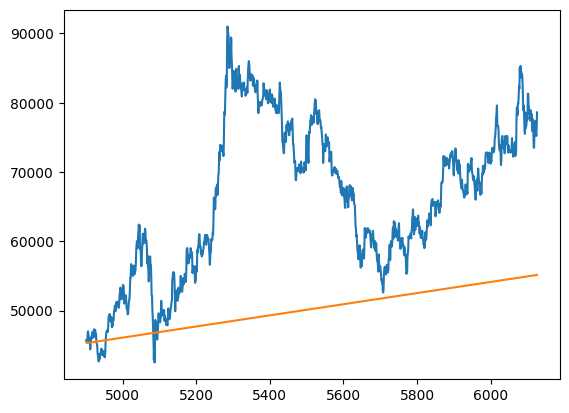

In [47]:
plt.plot(test['Close'], label = 'True')
plt.plot(forecast, label = 'Predicted')
plt.show()